### Introduction to Machine Learning with Python
## Chapter 2. 지도학습
---
## 나이브 베이즈 (Naive Bayes)

- 나이브 베이즈는 통계수학에 기반한 머신러닝 알고리즘 입니다. 핵심 이론은 베이즈 방정식입니다.
> 집합 A 와 B 의 교집합 $ A \cap B $ <br><br>
> $ A \cap B = P(A \vert B) P(B) = P(B \vert A) P(A) $ <br><br>
> $ P(A \vert B) = { {P(A) P(B \vert A)} \over P(B) }$

- 나이브 베이즈에서는 각 속성을 독립적이라고 가정한다. 자세한 공식은 아래와 같다. (출처 : http://scikit-learn.org/stable/modules/naive_bayes.html)
> <img src="ch02_13.jpg" />

- 나이브 베이즈는 언어와 관련된 부분에서 많이 사용된다. 메일에서 스팸/햄 을 구분하는 문제가 대표적인 경우이다.
- 또한 속성이 아주 많지만 대부분의 속성이 0/1 과 같은 이산적인 특성을 가질 때, 훈련데이터가 많지 않아도 좋은 성능을 보여준다.

- 스팸메일을 구분하는 사례를 예로 들면 아래와 같다.
> $$ P(스팸 \vert [멍청이, 싸요싸]) = {{P(스팸) P([멍청이, 싸요싸] \vert 스팸)} \over P([멍청이,싸요싸])} $$
$$ \propto P(스팸) \cdot P(멍청이 \vert 스팸) \cdot P(싸요싸 \vert 스팸) $$
> $$ P(햄 \vert [멍청이, 싸요싸]) = {{P(햄) P([멍청이, 싸요싸] \vert 햄)} \over P([멍청이,싸요싸])} $$
$$ \propto P(햄) \cdot P(멍청이 \vert 햄) \cdot P(싸요싸 \vert 햄) $$

- 각 샘플마다 위의 두 확률을 구한 다음, 그 값에 따라 스팸과 햄을 결정한다

In [1]:
#####
# code : http://scikit-learn.org/stable/modules/naive_bayes.html
#####

import numpy as np
from sklearn.naive_bayes import BernoulliNB

X = np.random.randint(2, size=(6, 100))
y = np.array([1, 2, 3, 4, 4, 5])

model = BernoulliNB()
model.fit(X, y)

pred_y = model.predict(X)
print(pred_y)

[1 2 3 4 4 5]


- Classification of text documents using sparse features

<img src="ch02_14.jpg" />
<p>(출처 : http://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html)</p>

- 스팸메일에서와 같이 특정 단어가 있다/없다 처럼 이진 속성을 가지고 속성이 아주 많은 경우에는 **BernoulliNB** 를 주로 적용한다.
- 이진 속성이 아닌 일반적인 연속값 속성을 가지는 데이터에는 **GaussianNB** 를 적용한다.
- 스팸메일과 같은 경우에도, 나이브베이즈는 로지스틱회귀 보다 일반적으로 성능이 떨어지므로 잘 사용되지 않는 경향이다.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

# model = BernoulliNB()
model = GaussianNB()
# model = MultinomialNB()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
display(train_score, test_score)

0.9342723004694836

0.9440559440559441

0.8811188811188811


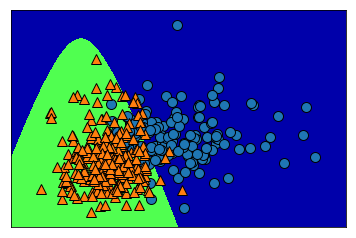

In [8]:
import mglearn

X_train, X_test, y_train, y_test = train_test_split(cancer.data[:,[0,1]], cancer.target)

model = GaussianNB()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

mglearn.plots.plot_2d_classification(model, X_train)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

0.9020979020979021


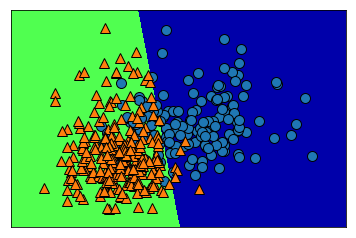

In [9]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(cancer.data[:,[0,1]], cancer.target)

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

mglearn.plots.plot_2d_classification(model, X_train)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)